In [1]:
from time import sleep
from random import uniform
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC

In [2]:
PATH = "/Users/vicky/Desktop/chromedriver"
driver = webdriver.Chrome(PATH)
driver.get("localhost:8080")

Frame = WebDriverWait(driver, 10).until(
        #EC.presence_of_element_located((By.XPATH,'//*[@id="root"]/div/div/div/div/ul/li'))
        EC.presence_of_element_located((By.CLASS_NAME,'App'))
        )


pngimg = Frame.screenshot_as_png
f = open('/Users/vicky/Desktop/file2.png', 'wb')
f.write(pngimg)
f.close()

driver.quit()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load net models
net = cv2.dnn.readNetFromDarknet('/Users/vicky/Desktop/yolo/yolov3.cfg','/Users/vicky/Desktop/yolo/yolov3.weights')

In [5]:
classes = []

with open('/Users/vicky/Desktop/yolo/coco.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

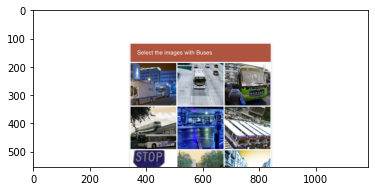

In [6]:
my_img = cv2.imread('/Users/vicky/Desktop/file2.png')
plt.imshow(my_img)

In [7]:
ht,wt, _ = my_img.shape

In [8]:
blob = cv2.dnn.blobFromImage(my_img,1/255,(416,416),(0,0,0),swapRB = True, crop = False)

In [9]:
blob.shape

(1, 3, 416, 416)

In [10]:

net.setInput(blob)
last_layer = net.getUnconnectedOutLayersNames()
layer_out = net.forward(last_layer)


boxes = []
confidences = []
class_ids = []

for output in layer_out:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(detection[0] * wt)
            center_y = int(detection[1] * ht)
            w = int(detection[2] * wt)
            h = int(detection[3] *ht)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [11]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size= (len(boxes),3))

In [ ]:
for i in indexes .flatten():
    x,y,w,h = boxes[i]
    label =str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_img,label + " "+confidence,(x,y+20),font,2,(0,0,0),2)
    
cv2.imshow('img',my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

driver.close()